In [119]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Introduction to the Data

In this Kaggle competition, we have a data set of different information about passengers onboard the Titanic, and I will use that information to predict whether those people survived or not. 

- The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, Survival.

- The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.


Once I have trained the model on the training set, I'll use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.


In this project, I'll:

- Prepare the data for machine learning
- Train a model
- Measure the accuracy of your model
- Prepare and make a Kaggle submission.

In [120]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

test = pd.read_csv("test.csv")
test_shape = test.shape
train = pd.read_csv("trainp.csv")
train_shape = train.shape
print(test_shape)
print(train_shape)

(418, 11)
(891, 12)


## Exploring the Data

Here are the Data Dictionary for the dataset giving details about the datapoiints

- PassengerID - A column added by Kaggle to identify each row and make submissions easier
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex - The passenger's sex
- Age - The passenger's age in years
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger's ticket number
- Fare - The fare the passenger paid
- Cabin - The passenger's cabin number
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)



In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The type of machine learning I'll be doing is called classification (that is logistic, in relative to regression), because when I make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

Using Domain Knowledge having watched the movie Titanic, I remember that women and children were given preference to lifeboats (as they were in real life). I also remember the vast class disparity of the passengers.

This indicates that Age, Sex, and PClass may be good predictors of survival.

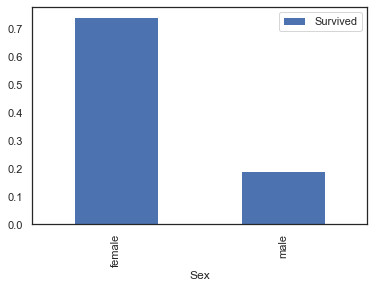

In [122]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

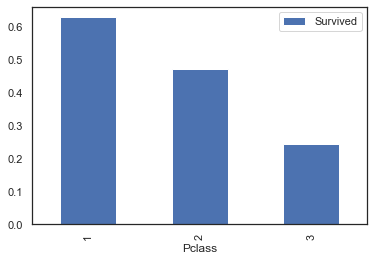

In [123]:
Pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
Pclass_pivot.plot.bar()
plt.show()

## Feature Selection

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [125]:
for i in train.columns:

    print(train[i].value_counts(normalize=True, dropna=False) * 100)

891    0.112233
293    0.112233
304    0.112233
303    0.112233
302    0.112233
301    0.112233
300    0.112233
299    0.112233
298    0.112233
297    0.112233
296    0.112233
295    0.112233
294    0.112233
292    0.112233
306    0.112233
291    0.112233
290    0.112233
289    0.112233
288    0.112233
287    0.112233
286    0.112233
285    0.112233
284    0.112233
283    0.112233
282    0.112233
281    0.112233
305    0.112233
307    0.112233
279    0.112233
321    0.112233
         ...   
561    0.112233
560    0.112233
584    0.112233
585    0.112233
586    0.112233
587    0.112233
610    0.112233
609    0.112233
608    0.112233
607    0.112233
606    0.112233
605    0.112233
604    0.112233
603    0.112233
602    0.112233
601    0.112233
600    0.112233
599    0.112233
598    0.112233
597    0.112233
596    0.112233
595    0.112233
594    0.112233
593    0.112233
592    0.112233
591    0.112233
590    0.112233
589    0.112233
588    0.112233
1      0.112233
Name: PassengerId, Lengt

In [126]:
train_features = train.drop(["PassengerId", "Survived"], axis=1)

In [127]:
test_features = test.drop(["PassengerId"], axis=1)

## Finding missing NaN values

In [128]:
train_features.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [129]:
test_features.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [130]:
train_features["Age"] = train_features["Age"].fillna(-0.5)
test_features["Age"] = test_features["Age"].fillna(-0.5)

In [131]:
test_features["Fare"] = test_features["Fare"].fillna(test_features["Fare"].mean())


train_features["Embarked"] = train_features["Embarked"].fillna("S")


In [132]:
test_features.notnull().sum()

Pclass      418
Name        418
Sex         418
Age         418
SibSp       418
Parch       418
Ticket      418
Fare        418
Cabin        91
Embarked    418
dtype: int64

In [133]:
train_features.notnull().sum()

Pclass      891
Name        891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    891
dtype: int64

## Engineering More Features

In [134]:

print(train_features.describe(include='all',percentiles=[]))

            Pclass                            Name   Sex         Age  \
count   891.000000                             891   891  891.000000   
unique         NaN                             891     2         NaN   
top            NaN  Holverson, Mr. Alexander Oskar  male         NaN   
freq           NaN                               1   577         NaN   
mean      2.308642                             NaN   NaN   23.699966   
std       0.836071                             NaN   NaN   17.731181   
min       1.000000                             NaN   NaN   -0.500000   
50%       3.000000                             NaN   NaN   24.000000   
max       3.000000                             NaN   NaN   80.000000   

             SibSp       Parch Ticket        Fare        Cabin Embarked  
count   891.000000  891.000000    891  891.000000          204      891  
unique         NaN         NaN    681         NaN          147        3  
top            NaN         NaN   1601         NaN  C23 C2

In [135]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [136]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train_features["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train_features["Title"] = extracted_titles.map(titles)
extracted_titles = test_features["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
test_features["Title"] = extracted_titles.map(titles)

 
train_features["Cabin_type"] = train_features["Cabin"].str[0]
train_features["Cabin_type"] = train_features["Cabin_type"].fillna("Unknown")
test_features["Cabin_type"] = test_features["Cabin"].str[0]
test_features["Cabin_type"] = test_features["Cabin_type"].fillna("Unknown")

In [137]:
def process_age(df):
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points_1,labels=label_names_1)
    return df

cut_points_1 = [0,12,50,100,1000]
label_names_1 = ["0-12","12-50","50-100","100+"]

train_features = process_fare(train_features,cut_points_1,label_names_1)
test_features = process_fare(test_features,cut_points_1,label_names_1)

train_features = process_age(train_features)
test_features = process_age(test_features)

for column in ["Age_categories","Pclass","Sex", "Embarked","Fare_categories","Title","Cabin_type"]:
    train_features = create_dummies(train_features,column)
    test_features = create_dummies( test_features,column)



In [138]:
print(train_features.columns)
print(test_features.columns)

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'Cabin_type', 'Fare_categories',
       'Age_categories', 'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'C

In [139]:
cols = ["Age_categories","Pclass","Sex", "Embarked", "Fare_categories","Title","Cabin_type"] 
test_features =  test_features.drop(cols, axis=1)
train_features =  train_features.drop(cols, axis=1)

In [140]:
print(train_features.columns)
print(test_features.columns)

Index(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown'],
      dtype='object')
Index(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Youn

## Rescaling

In [141]:
from sklearn.preprocessing import minmax_scale
rescaling_columns = ["SibSp","Parch"]
for col in rescaling_columns:
    train_features[col + "_scaled"] = minmax_scale(train_features[col])
    test_features[col + "_scaled"] = minmax_scale(test_features[col])

In [142]:
print(train_features.columns)
print(test_features.columns)

Index(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown', 'SibSp_scaled', 'Parch_scaled'],
      dtype='object')
Index(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenag

In [143]:
train_features = train_features.drop(["Ticket",'SibSp', 'Parch'], axis=1)
test_features = test_features.drop(["Ticket",'SibSp', 'Parch'], axis=1)

In [144]:
train_features = train_features.drop(['Name', 'Age', 'Fare', 'Cabin'], axis=1)
test_features = test_features.drop(['Name', 'Age', 'Fare', 'Cabin'], axis=1)


## Finding the most Relevant Features

In [145]:
print(train_features.columns)
print(test_features.columns)

Index(['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown', 'SibSp_scaled', 'Parch_scaled'],
      dtype='object')
Index(['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',


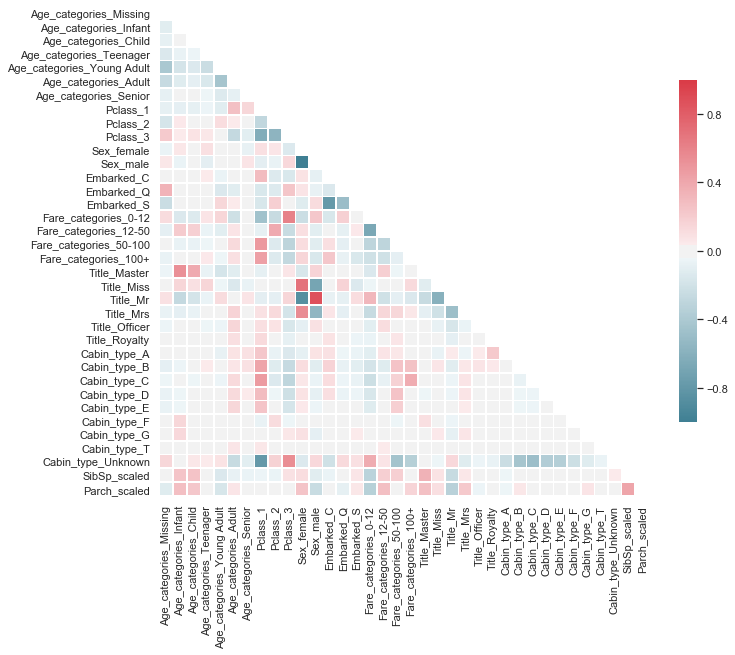

In [146]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .7})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown', 'SibSp_scaled', 'Parch_scaled']
plot_correlation_heatmap(train_features[columns])

## Final Feature Selection using RFECV

I'll use Logistic Regression to train the model as earlier stated

In [147]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train_features[columns]
all_y = train["Survived"]
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]



In [148]:
print(optimized_columns)

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')


In [149]:
from sklearn.model_selection import cross_val_score

all_X = train_features[optimized_columns]
all_y = train["Survived"]
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.8226549199863807


## Model Selection and Tuning Using GridSearchCV


In [150]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
print(accuracy_rf )

0.8193215866530472


In [151]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

In [152]:
print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
0.8181818181818182


## Submitting our Model to Kaggle

In [153]:
lr = LogisticRegression()
lr.fit(all_X,all_y)
tests_predictions = lr.predict(test_features[optimized_columns])

test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,
                 "Survived": tests_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("Survival_Prediction.csv",index=False)